# 美国航班的准点数据分析

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [7]:
# 航班数据的链接网址
link = 'https://projects.fivethirtyeight.com/flights/'

In [8]:
# 查看本地dada目录中的数据文件（项目中的实验数据都在data目录中）
# win中
# !dir "../data/"
# linux中
!ls "../data"

'ls' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [9]:
# 从本地读取航班数据
flights_df = pd.read_csv("./data/usa_flights.csv")

In [10]:
# 查看前五行数据
flights_df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0


## 1.查看飞机延误时间最长的前10名

In [11]:
flights_df.sort_values('arr_delay', ascending=False)[:10]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,11/01/2015 0:00,AA,1595,AUS,DFW,1444.0,0,190,1444.0,0.0,0.0,0.0,0.0,59.0
10214,13/01/2015 0:00,AA,1487,OMA,DFW,1392.0,0,583,1392.0,0.0,0.0,0.0,0.0,117.0
12430,03/01/2015 0:00,AA,1677,MEM,DFW,1384.0,0,432,1380.0,0.0,0.0,4.0,0.0,104.0
8443,04/01/2015 0:00,AA,1279,OMA,DFW,1237.0,0,583,1222.0,0.0,15.0,0.0,0.0,102.0
10328,05/01/2015 0:00,AA,1495,EGE,DFW,1187.0,0,721,1019.0,0.0,168.0,0.0,0.0,127.0
36570,04/01/2015 0:00,DL,1435,MIA,MSP,1174.0,0,1501,1174.0,0.0,0.0,0.0,0.0,231.0
36495,04/01/2015 0:00,DL,1367,ROC,ATL,1138.0,0,749,1112.0,0.0,0.0,26.0,0.0,171.0
59072,14/01/2015 0:00,DL,1687,SAN,MSP,1084.0,0,1532,1070.0,0.0,0.0,14.0,0.0,240.0
32173,05/01/2015 0:00,AA,970,LAS,LAX,1042.0,0,236,1033.0,0.0,9.0,0.0,0.0,66.0
56488,12/01/2015 0:00,DL,2117,ATL,COS,1016.0,0,1184,1016.0,0.0,0.0,0.0,0.0,193.0


**可得出初步结论，航空公司AA、DL的延误频次要比其他航空公司高，且AA航空公司比Dl航空公司高。如果有急事出行的话，可以尽量避开这两家航班公司。**

## 2.计算延误和没有延误的飞机所占的比例

In [12]:
# 添加一列判断航班是否延误
flights_df['delayed'] = flights_df['arr_delay'].apply(lambda x: x > 0)
# 查看前五行数据
flights_df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0,False
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0,False
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0,False
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0,False
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0,True


In [13]:
# 查看延误飞机的数量（False：非延误  True：延误）
delay_data = flights_df['delayed'].value_counts()
delay_data

False    103037
True      98627
Name: delayed, dtype: int64

In [14]:
# 计算延误航班所占的比例
delay_data[1]/(delay_data[0]+delay_data[1])

0.4890659711202793

**由此可得出在美国的所有航班中，有48%的航班都发生过延误。**

In [15]:
# 计算每一个航空公司延误的情况
delay_group = flights_df.groupby(['unique_carrier', 'delayed'])
df_delay = delay_group.size().unstack()
df_delay

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


**由上表可以得出，大部分航空公司的准点次数要大于延误次数**

### 图形展示

In [16]:
import matplotlib.pyplot as plt

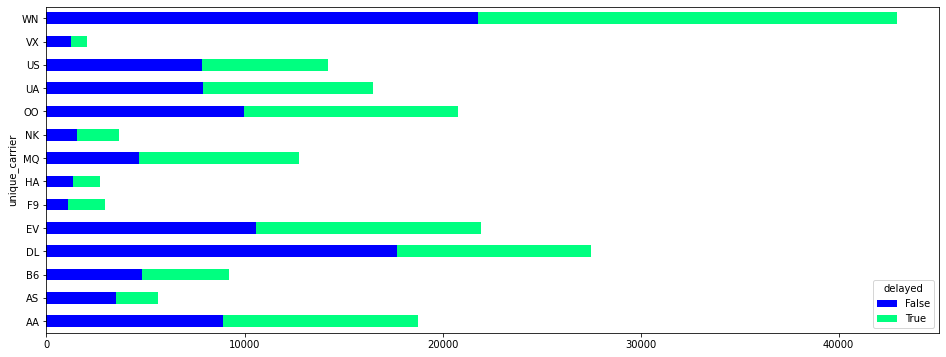

In [17]:
# barh 柱状图
# stacked=True 横向展示
# figsize=[16, 6] 宽16，高6
# colormap='winter' 使用winter色
df_delay.plot(kind='barh', stacked=True, figsize=[16, 6], colormap='winter')
plt.show()

**由图形可以更直观的看出，飞行次数最多的公司是WN。虽然Dl公司的延时时间是相对比较长的，但他的延误次数却相比与其他公司要低。其次AS、VX两家小型航空公司的延误次数也比较低。**

#### 4.透视表

In [18]:
# index 索引
# columns 列名
# values 要显示的值
# aggfunc 聚合函数
flight_by_carrier = flights_df.pivot_table(index='flight_date', columns='unique_carrier', values='flight_num', aggfunc='count')
flight_by_carrier

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
02/01/2015 0:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
03/01/2015 0:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
04/01/2015 0:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
05/01/2015 0:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
06/01/2015 0:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396
07/01/2015 0:00,1420,419,694,2107,1705,228,208,998,284,1557,1259,1143,151,3398
08/01/2015 0:00,1447,444,731,2214,1759,224,208,1009,284,1625,1331,1171,164,3398
09/01/2015 0:00,1448,447,730,2204,1767,229,222,1010,289,1631,1331,1169,167,3364
10/01/2015 0:00,1285,412,641,1584,1133,168,201,768,285,1270,908,912,109,2668


**由透视表我们可以看出，每天航班次数最多的公司是WN，其次是DL和EV。由此可猜测他们几家应该是大型航空公司。**